In [116]:
import numpy as np
from PIL import Image
import os, sys
import cv2


x_data = []

def resizeToGray(path):
    dirs = os.listdir( path )
    for item in dirs:
        if os.path.isfile(path+item):
            im = cv2.imread(path+item, cv2.IMREAD_UNCHANGED)
            f, e = os.path.splitext(path+item)
            scale_percent = 3 # percent of original size
            width = 60
            height = 60
            dim = (width, height)
            imResize = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
            imGray = cv2.cvtColor(imResize, cv2.COLOR_BGR2GRAY)
            x_data.append(imGray)

resizeToGray("E:/Clase/SI/Data/train/Type_1/")
y_type1 = np.ones((len(x_data),), dtype=int)

resizeToGray("E:/Clase/SI/Data/train/Type_2/")
y_type2 = np.full(len(x_data)-len(y_type1), 2)

resizeToGray("E:/Clase/SI/Data/train/Type_3/")
y_type3 = np.full(len(x_data)-len(y_type1)-len(y_type2), 3)

y_data = np.concatenate((y_type1, y_type2, y_type3), axis = 0)

In [117]:
print(len(x_data), len(y_type1), len(y_type2), len(y_type3), len(y_type1)+len(y_type2)+len(y_type3))

1481 250 781 450 1481


(<matplotlib.image.AxesImage at 0x1b5c13dcc10>, (-0.5, 59.5, 59.5, -0.5))

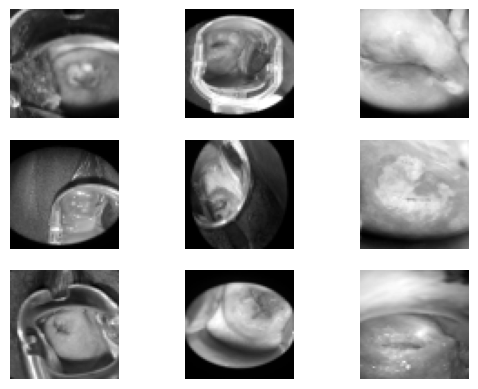

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import random

u1 = random.choice(x_data)
u2 = random.choice(x_data)
u3 = random.choice(x_data)
u4 = random.choice(x_data)
u5 = random.choice(x_data)
u6 = random.choice(x_data)
u7 = random.choice(x_data)
u8 = random.choice(x_data)
u9 = random.choice(x_data)

plt.subplot(331)
plt.imshow(u1, "gray"), plt.axis("off")
plt.subplot(332)
plt.imshow(u2, "gray"), plt.axis("off")
plt.subplot(333)
plt.imshow(u3, "gray"), plt.axis("off")
plt.subplot(334)
plt.imshow(u4, "gray"), plt.axis("off")
plt.subplot(335)
plt.imshow(u5, "gray"), plt.axis("off")
plt.subplot(336)
plt.imshow(u6, "gray"), plt.axis("off")
plt.subplot(337)
plt.imshow(u7, "gray"), plt.axis("off")
plt.subplot(338)
plt.imshow(u8, "gray"), plt.axis("off")
plt.subplot(339)
plt.imshow(u9, "gray"), plt.axis("off")

In [119]:
import pandas as pd

x_numpy = np.array(x_data)

x_numpy = x_numpy.reshape(x_numpy.shape[0], (x_numpy.shape[1]*x_numpy.shape[2]))

df = pd.DataFrame(x_numpy)
df["Tipo"] = y_data

df

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,Tipo
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,15,15,18,18,18,21,18,16,17,18,...,65,104,129,135,126,107,82,57,39,1
2,124,141,156,171,185,201,219,236,242,232,...,41,39,35,27,17,8,2,1,1,1
3,224,227,232,235,240,241,239,236,240,245,...,174,177,178,174,171,167,164,158,150,1
4,165,155,159,153,126,115,88,72,74,69,...,83,81,81,84,83,78,74,71,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,49,47,45,60,69,80,86,98,122,141,...,178,177,176,177,179,174,172,174,175,3
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1478,125,129,134,138,140,143,145,146,147,150,...,109,109,110,109,108,109,110,111,112,3
1479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [120]:
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

y = df.iloc[:, -1]
x = df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

rf = RandomForestClassifier (random_state=42).fit(X_train,y_train)


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


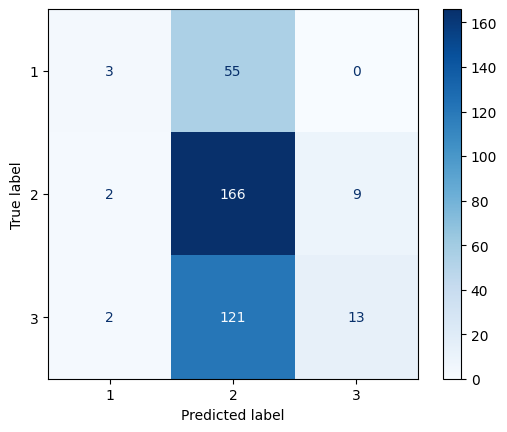

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [122]:
from sklearn.metrics import classification_report

y_pred = rf.predict(x)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.78      0.87       250
           2       0.81      0.99      0.89       781
           3       0.97      0.73      0.83       450

    accuracy                           0.87      1481
   macro avg       0.92      0.83      0.86      1481
weighted avg       0.89      0.87      0.87      1481



In [129]:
target_count = [len(y_type1), len(y_type2), len(y_type3)]
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 3:', target_count[2])
print('Proportion: 1:2', round(target_count[0] / target_count[1], 2), ': 1')
print('Proportion: 1:3', round(target_count[0] / target_count[2], 2), ': 1')
print('Proportion: 2:3', round(target_count[1] / target_count[2], 2), ': 1')


Class 0: 250
Class 1: 781
Class 3: 450
Proportion: 1:2 0.32 : 1
Proportion: 1:3 0.56 : 1
Proportion: 2:3 1.74 : 1


In [130]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


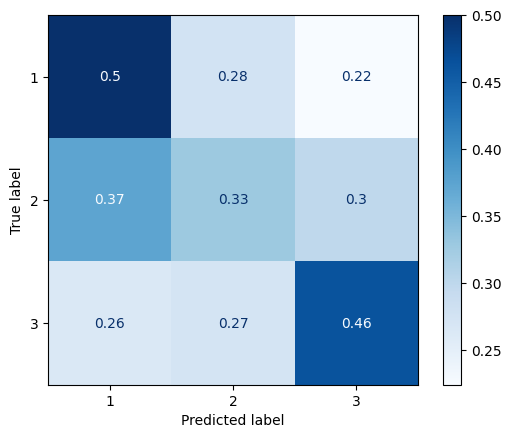

In [132]:
clf_rus = RandomForestClassifier(n_jobs=-1)

clf_rus.fit(X_rus, y_rus)

plot_confusion_matrix(clf_rus, X_test, y_test, cmap='Blues', normalize='true')
plt.show()

In [134]:
from sklearn.metrics import classification_report

y_pred = clf_rus.predict(x)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.42      0.88      0.57       250
           2       0.81      0.46      0.59       781
           3       0.61      0.70      0.65       450

    accuracy                           0.60      1481
   macro avg       0.61      0.68      0.60      1481
weighted avg       0.69      0.60      0.60      1481



In [135]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='auto', n_jobs=-1)
X_tl, y_tl = tl.fit_resample(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


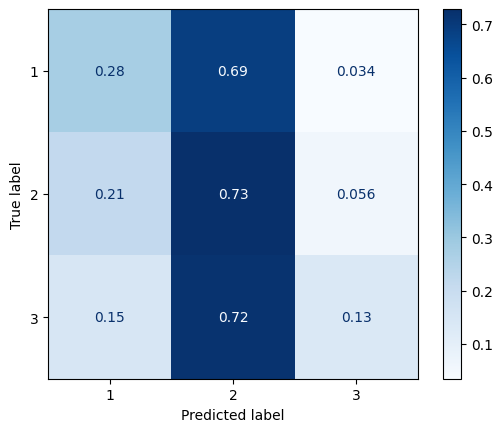

In [137]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

clf_sm = RandomForestClassifier(n_jobs=-1)

clf_sm.fit(X_sm, y_sm)
plot_confusion_matrix(clf_sm, X_test, y_test, normalize='true', cmap='Blues')
plt.show()